In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from ReliefF import ReliefF
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

from util import *

In [2]:
diabetes_df = read_diabetes_data()
features_df = data_cleaning(diabetes_df)
features_df = label_encoding(features_df)
y = create_target(diabetes_df)

In [3]:
top_features = ['troglitazone', 'glipizide-metformin', 'glimepiride-pioglitazone',
       'examide', 'citoglipton', 'miglitol', 'acetohexamide',
       'metformin-rosiglitazone', 'metformin-pioglitazone', 'tolazamide',
       'tolbutamide', 'chlorpropamide', 'acarbose', 'nateglinide', 'weight',
       'glyburide-metformin', 'repaglinide', 'max_glu_serum',
       'number_inpatient', 'number_emergency', 'glimepiride', 'rosiglitazone',
       'pioglitazone', 'number_outpatient', 'glipizide', 'glyburide',
       'A1Cresult', 'medical_specialty', 'discharge_disposition_id',
       'metformin', 'race', 'diabetesMed', 'gender', 'diag_3',
       'admission_type_id', 'change', 'diag_2', 'diag_1', 'num_procedures',
       'insulin', 'number_diagnoses', 'age', 'time_in_hospital',
       'num_lab_procedures', 'num_medications']

In [4]:
X = features_df[top_features[0:36]].values
X = X.reshape(101766, 6, 6)
np.shape(X)

(101766, 6, 6)

In [5]:
X_embedding = get_intermediate_layer_output(X)

2022-04-15 13:19:19.871606: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
cv_scores = model_training_random_forest(X_embedding, y)
cv_scores

{'fit_time': array([10.33338475, 10.2104609 , 10.25435376, 10.21451902, 10.28272915]),
 'score_time': array([0.24626994, 0.15252304, 0.18107533, 0.21908712, 0.19070601]),
 'test_accuracy': array([0.61945536, 0.60805784, 0.61297115, 0.61311153, 0.60897031]),
 'train_accuracy': array([0.69769074, 0.69976662, 0.69874888, 0.69906473, 0.70006492]),
 'test_recall': array([0.49474646, 0.45370088, 0.48461773, 0.47449368, 0.46261611]),
 'train_recall': array([0.57412625, 0.55411733, 0.56888872, 0.56932917, 0.56049646]),
 'test_f1': array([0.54513423, 0.5162017 , 0.53578043, 0.53065395, 0.5216794 ]),
 'train_f1': array([0.63644805, 0.62981393, 0.6351426 , 0.63555612, 0.63270086])}

Text(0.5, 1.0, 'CNN/RandomForest')

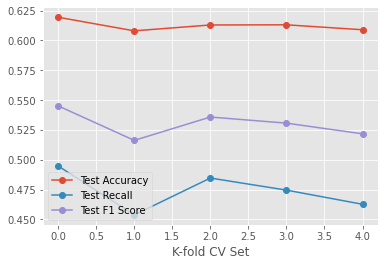

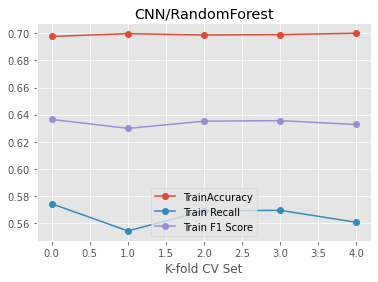

In [11]:
plot_cv_scores(cv_scores)
plt.title("CNN/RandomForest")

In [8]:
cv_scores = model_training_svm(X_embedding, y)
cv_scores

{'fit_time': array([1107.97883296, 1120.76935124, 1118.39644814, 1121.23775578,
        1116.28551793]),
 'score_time': array([194.34893203, 189.58361077, 192.015311  , 189.44124794,
        190.15062785]),
 'test_accuracy': array([0.63061482, 0.62027093, 0.62806205, 0.62595634, 0.62349968]),
 'train_accuracy': array([0.62964133, 0.63113934, 0.62996368, 0.6297882 , 0.63071821]),
 'test_recall': array([0.50266484, 0.48081023, 0.5016753 , 0.49885793, 0.49535557]),
 'train_recall': array([0.50540623, 0.49674497, 0.49354704, 0.5035407 , 0.50121831]),
 'test_f1': array([0.55642646, 0.53855339, 0.55421889, 0.55146873, 0.54810447]),
 'train_f1': array([0.55711768, 0.5538553 , 0.55147184, 0.55629863, 0.55577836])}

Text(0.5, 1.0, 'CNN/SVM')

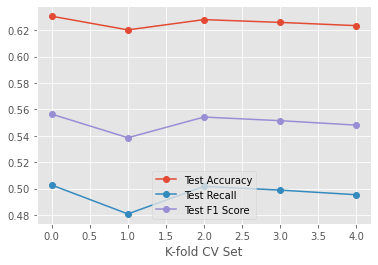

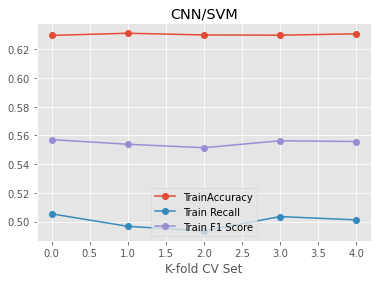

In [9]:
plot_cv_scores(cv_scores)
plt.title("CNN/SVM")